In [1]:
#mporting the libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

# Read train.csv file and set datatype
data_type = {'store': 'int8', 'item': 'int8', 'sales': 'int16'}
df = pd.read_csv("C:/Users/gautam.ghosh/Desktop/ML-Data/train.csv/train.csv", parse_dates= ['date'], dtype= data_type)
#print(df)
df.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


In [2]:
df['whichMonth'] = df['date'].dt.month
df['whichYear'] = df['date'].dt.year
#print(df)
col = [i for i in df.columns if i not in ['sales']]
#print(col)

y = [i for i in df.columns if i in ['sales']]
print(y)

train = df.loc[~df.sales.isna()]
#print(train)

['sales']


In [3]:
from sklearn import cross_validation
X_train, X_test, y_train, y_test = cross_validation.train_test_split(train[col],train[y], test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
#X_train.head()

C:\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


(730400, 5)
(182600, 5)


['sales']

912999
Sales bucket v/s Total percentage:


(0, 50]       54.591407
(50, 100]     38.388322
(100, 150]     6.709974
(150, 200]     0.308544
(200, 250]     0.001752
Name: sales_bins, dtype: float64

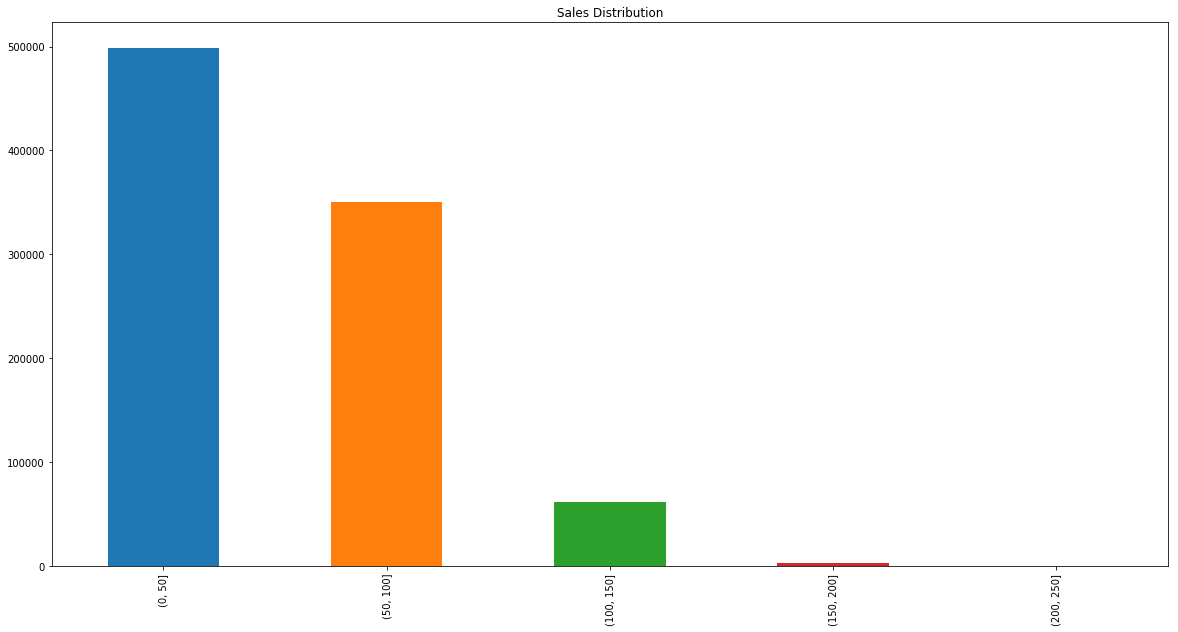

In [4]:
# distribution plot
import matplotlib.pyplot as plt
import seaborn as sns

y = [i for i in df.columns if i in ['sales']]
display(y)

# sales buckets 
sales_df = train.copy(deep=True)
sales_df['sales_bins'] = pd.cut(sales_df.sales, [0, 50, 100, 150, 200, 250])

# Total number of data points
total_points = pd.value_counts(sales_df.sales_bins).sum()
print(total_points)
print('Sales bucket v/s Total percentage:')
display(pd.value_counts(sales_df.sales_bins).apply(lambda s: (s/total_points)*100))

f, ax = plt.subplots(figsize=(20, 10))
pd.value_counts(sales_df.sales_bins).plot(kind='bar', title='Sales Distribution'); 


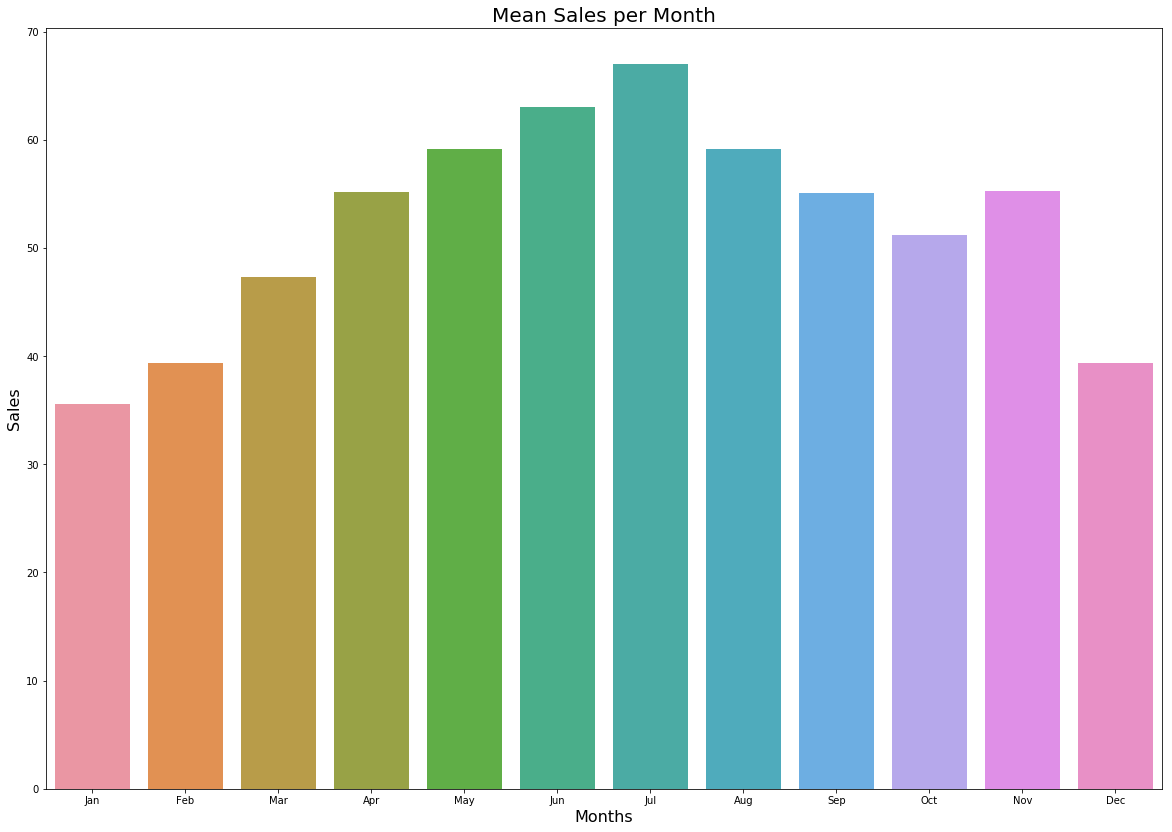

In [5]:
# monthly sales

import matplotlib.pyplot as plt
import seaborn as sns
train['WhichMonth']= train['date'].dt.month
train['WhichYear']= train['date'].dt.year

x = train.groupby([train.WhichMonth])['sales'].mean()


f, ax = plt.subplots(figsize=(20, 14))
x.index = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

ax = sns.barplot(x=x.index, y=x.values, 
               label="Total")

ax.set_xlabel(xlabel='Months', fontsize=16)
ax.set_ylabel(ylabel='Sales', fontsize=16)
ax.set_title(label='Mean Sales per Month', fontsize=20)
plt.show();

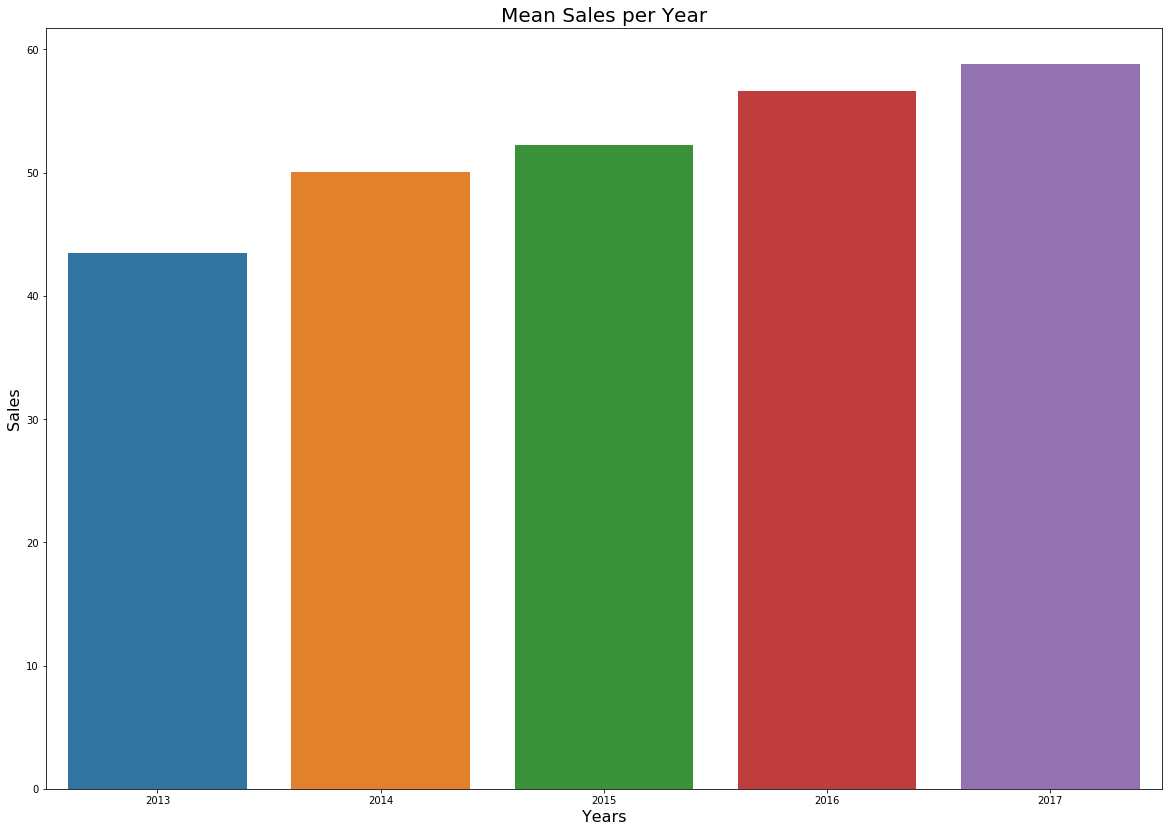

In [6]:
#Yearly sales 
yearlySales = train.groupby([train.WhichYear])['sales'].mean()

f, ax = plt.subplots(figsize=(20, 14))
yearlySales.index = ["2013", "2014", "2015", "2016", "2017"]
ax = sns.barplot(x=yearlySales.index, y=yearlySales.values, 
               label="Total")

ax.set_xlabel(xlabel='Years', fontsize=16)
ax.set_ylabel(ylabel='Sales', fontsize=16)
ax.set_title(label='Mean Sales per Year', fontsize=20)
plt.show();

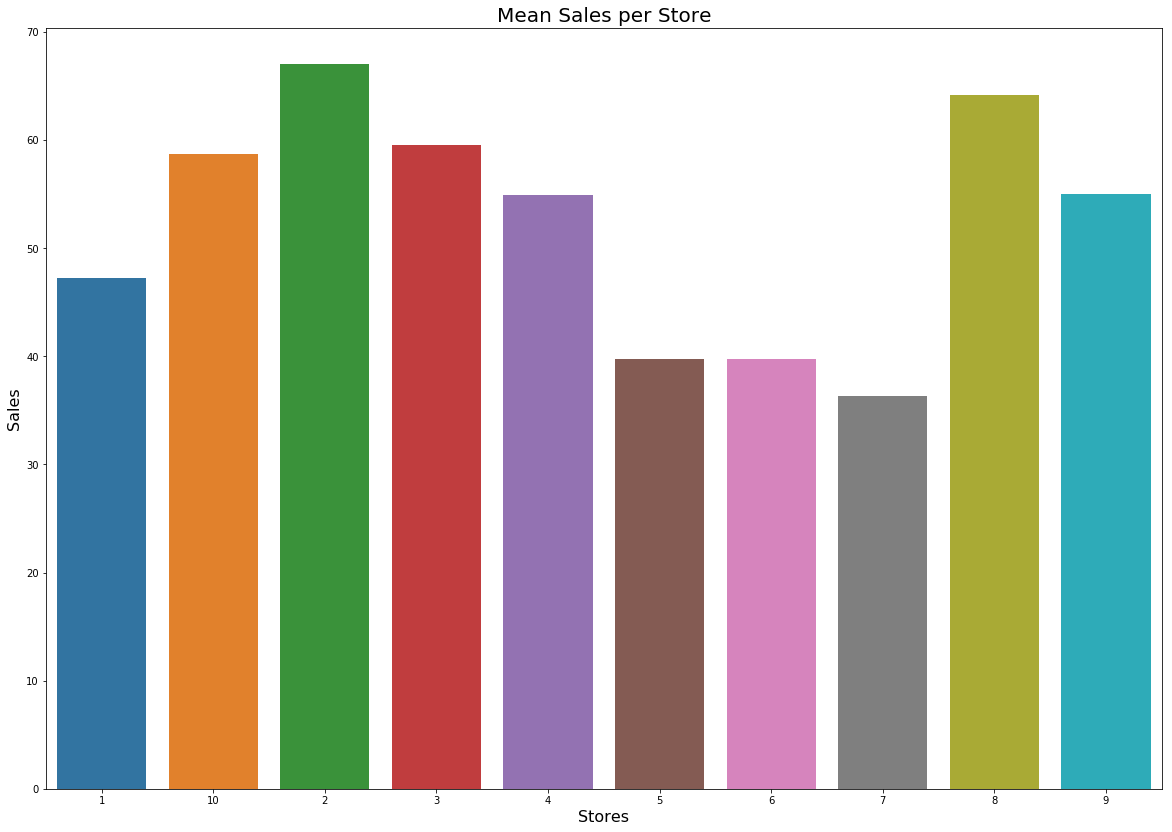

In [7]:
StoreSales = train.groupby([train.store])['sales'].mean()
#print(StoreSales)
f, ax = plt.subplots(figsize=(20, 14))
StoreSales.index = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]
ax = sns.barplot(x=StoreSales.index, y=StoreSales.values, 
               label="Mean sales per Store")

ax.set_xlabel(xlabel='Stores', fontsize=16)
ax.set_ylabel(ylabel='Sales', fontsize=16)
ax.set_title(label='Mean Sales per Store', fontsize=20)
plt.show();



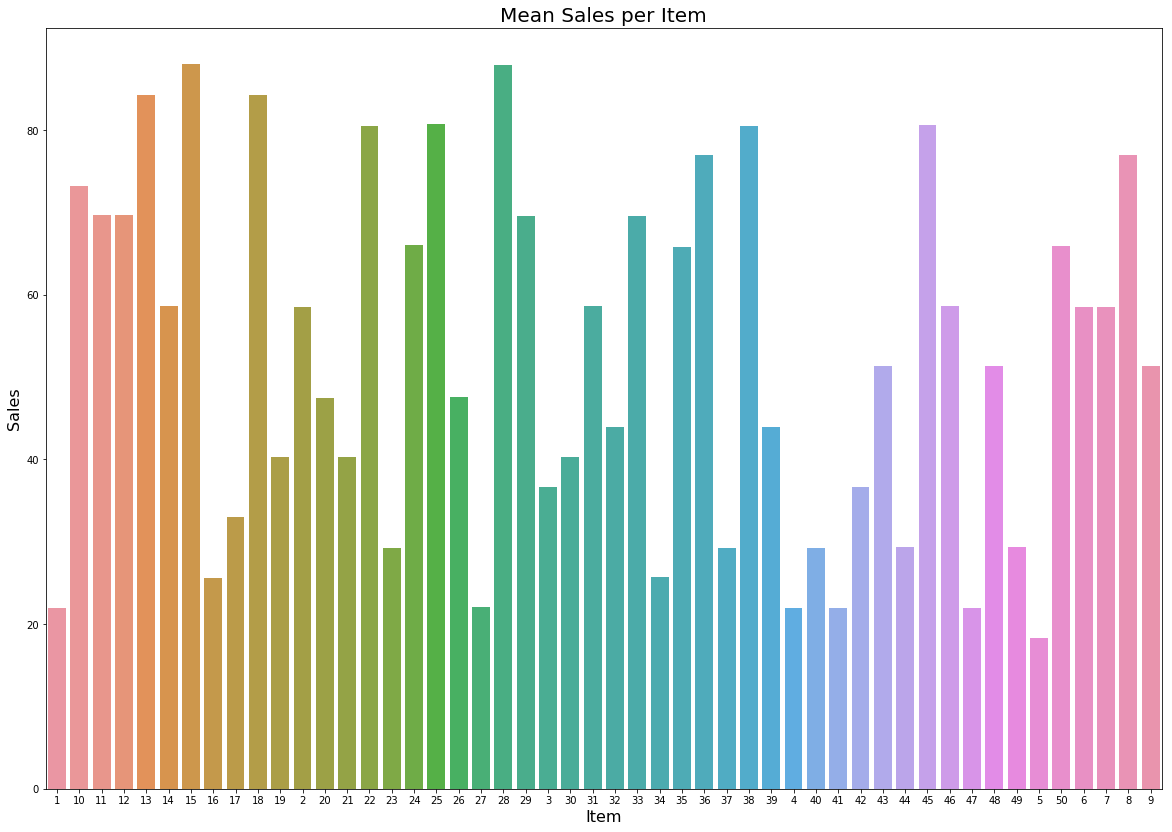

In [8]:
itemSales = train.groupby([train.item])['sales'].mean()
#print(itemSales)
f, ax = plt.subplots(figsize=(20, 14))
itemSales.index = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11","12", "13", "14", "15", "16", "17", "18", "19", "20", "21","22", "23", "24", "25", "26", "27", "28", "29", "30","31", "32", "33", "34", "35", "36", "37", "38", "39", "40", "41","42", "43", "44", "45", "46", "47", "48", "49", "50"]
ax = sns.barplot(x=itemSales.index, y=itemSales.values, 
               label="Mean sales per Item")

ax.set_xlabel(xlabel='Item', fontsize=16)
ax.set_ylabel(ylabel='Sales', fontsize=16)
ax.set_title(label='Mean Sales per Item', fontsize=20)
plt.show();

